# Predicting a Biological Response

## Оптимизация гиперпараметров модели

### Описание задачи

Необходимо предсказать биологический ответ молекул (столбец 'Activity') по их химическому составу (столбцы D1-D1776).

*   Первый столбец Activity содержит экспериментальные данные, описывающие фактический биологический ответ [0, 1];
*   Остальные столбцы D1-D1776 представляют собой молекулярные **дескрипторы** — это вычисляемые свойства, которые могут фиксировать некоторые характеристики молекулы, например размер, форму или состав элементов.

<img src="//lms-cdn.skillfactory.ru/assets/courseware/v1/243fdc2d8abf9f176c01a429f1ae68ab/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-3-ml-7-10.png">

Предварительная обработка не требуется, данные уже закодированы и нормализованы.

В качестве метрики будем использовать **F1-score**.

Необходимо обучить две модели: **логистическую регрессию и случайный лес**. Далее нужно сделать подбор гиперпараметров с помощью базовых и продвинутых методов оптимизации. Важно использовать все **четыре метода** (GridSeachCV, RandomizedSearchCV, Hyperopt, Optuna) хотя бы по разу, максимальное количество итераций не должно превышать 50.




In [19]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn.model_selection import cross_val_score #кросс-валидации

%matplotlib inline


In [20]:
# загружаем файл
data = pd.read_csv(r'C:\Users\Mira\Desktop\ML-7. Оптимизация гиперпараметров модели\Практика\_train_sem.csv')
display(data.head())
print(data.shape)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


(3751, 1777)


### Разделение датасета на матрицу данных и целевой признак, а также сплитование на тренировочный и тестовый наборы

In [21]:
y = data['Activity']
X = data.drop('Activity', axis = 1)
# Сплитование на тренировочные и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

### Логистическая регрессия

In [22]:
# Создаём объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(random_state = 42, max_iter=1000)
# Обучаем модель
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
print('accuracy на тестовой выборке: {:.2f}'.format(log_reg.score(X_test, y_test)))
print('f1-score на тестовой выборке: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовой выборке: 0.75
f1-score на тестовой выборке: 0.78


#### **GridSearchCV**

In [23]:
# Импортируем бибилиотеку GridSearchCV
from sklearn.model_selection import GridSearchCV

# задаём искомые гиперпараметры в виде словаря:
# ключами словаря являются имена настраиваемых гиперпараметров,
# а значениями – тестируемые настройки гиперпараметров
param_grid = {'penalty': ['l2', 'none'], #тип регуляризации
              'solver': ['lbfgs', 'saga'],  #алгоритм оптимизации
              'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]} # уровень силы регурялизации


# создаём объект класса GridSearchCV
grid_search = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state = 42,
        max_iter = 1000),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1
)
# обучаем модель на всех фолдах со всеми комбинациями по сетке
%time grid_search.fit(X_train, y_train)

# считаем метрикиб вызываем наилучшие значения гиперпараметров и выводим их на экран
print('accuracy на тестовом наборе: {:.2f}'.format(grid_search.score(X_test, y_test)))
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения параметров: {}'.format(grid_search.best_params_))

c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._valida

CPU times: total: 641 ms
Wall time: 1min 42s
accuracy на тестовом наборе: 0.78
f1_score на тестовом наборе: 0.80
Наилучшие значения параметров: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


Посмотрим на итоговую полученную модель  на наилучшее значение точности кросс-валидации с помощью методов best_estimator_ и best_score_.

In [24]:
print('Наилучшаая модель:\n{}'.format(grid_search.best_estimator_))
print('Наилучшее значение точности при кросс-валидаци: {:.2f}'.format(grid_search.best_score_))

Наилучшаая модель:
LogisticRegression(C=0.1, max_iter=1000, random_state=42)
Наилучшее значение точности при кросс-валидаци: 0.77


Постмотрим на таблицу результатов при кросс-валидации с помощью метода cv_results_

In [25]:
result_cv = pd.DataFrame(grid_search.cv_results_)
result_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.540435,0.014962,0.019585,0.002896,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.748333,0.791667,0.745000,0.771667,0.748333,0.761000,0.018062,3
1,8.357001,0.454684,0.015019,0.003703,0.01,l2,saga,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.741667,0.791667,0.746667,0.770000,0.748333,0.759667,0.018720,5


Посмотрим на тепловой карте, как менялась точность при различных гиперпараметрах

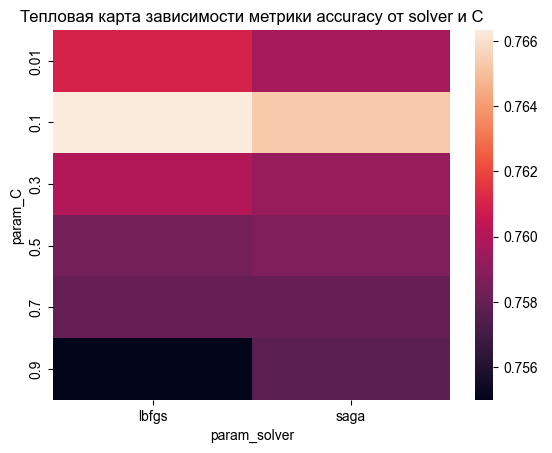

In [26]:
visual = pd.pivot_table(result_cv,
                        values = 'mean_test_score',
                        index = 'param_C',
                        columns = 'param_solver')
sns.heatmap(visual)
plt.title('Тепловая карта зависимости метрики accuracy от solver и С') # подпись графика
sns.set(rc={'figure.figsize': (8, 4)})  # задаём размер графика

По графику можно отметить, что при значении lbfgs параметра solver  для accuracy влияет негативно. Также видно, что нааиболее подходящяя сила регуляризации 0.01.

#### **RandomizedSearchCV**

In [27]:
# Импортируем бибилиотеку RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Задаём пространство гиперпараметров
param_distributions = {'penalty': ['l2', 'none'],
                       'solver': ['lbfgs', 'sag'],
                       'C': list(np.linspace(0.01, 1, 10, dtype = float))}
#создаём объект класса RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = linear_model.LogisticRegression(random_state = 42, max_iter = 1000),
    param_distributions = param_distributions,
    cv = 5,
    n_iter = 10,
    n_jobs = -1
)
# обучаем модель
%time random_search.fit(X_train, y_train)
print('accuracy на тестовом наборе данных: {:.2f}'.format(random_search.score(X_test, y_test)))
y_test_pred = random_search.predict(X_test)
print('f1_score на тестовом наборе данных: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('наилучшие знаечения гиперпараметров: {}'.format(random_search.best_params_))

c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mira\Desktop\Блок 3. Разведывательный анализ\Соревнование на Kaggle\Git_Hub\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validat

CPU times: total: 11.4 s
Wall time: 1min 41s
accuracy на тестовом наборе данных: 0.76
f1_score на тестовом наборе данных: 0.78
наилучшие знаечения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.56}


Значение метрики не изменилось, однако скорость обучения значительно улучшилась.

Посмотрим на итоговую полученную модель  на наилучшее значение точности кросс-валидации с помощью методов best_estimator_ и best_score_.

In [28]:
print('Наилучшаая модель:\n{}'.format(random_search.best_estimator_))
print('Наилучшее значение точности при кросс-валидаци: {:.2f}'.format(random_search.best_score_))

Наилучшаая модель:
LogisticRegression(C=0.56, max_iter=1000, random_state=42, solver='sag')
Наилучшее значение точности при кросс-валидаци: 0.76


### Случайный лес

In [29]:
# Создаём объект класса случайный лес
model_rf = ensemble.RandomForestClassifier(random_state = 42)
# обучаем модель
model_rf.fit(X_train, y_train)
# делаем предсказание
y_test_pred = model_rf.predict(X_test)
# считаем метрику
print('accuracy на тестовом наборе данных: {:.2f}'.format(model_rf.score(X_test, y_test)))
print('f1_score на тестовом наборе данных: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе данных: 0.81
f1_score на тестовом наборе данных: 0.82


Спазу видно, что модель случайного леса больше подходит для данной классфикации, так как метрика улучшилась даже при параметрах по умолчанию

#### **GridSearchCV**

In [30]:
#Задаём сетку гиперпараметров
param_grid = {'n_estimators': list(range(80, 200, 40)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 60, 5, dtype=int))}

# создаём объект класса GridSearchCV()
grid_search_rf = GridSearchCV(
	estimator=ensemble.RandomForestClassifier(random_state=42),
     param_grid=param_grid,
     cv=5,
     n_jobs=-1

)
# обучаем модель и выводим результаты
%time
grid_search_rf.fit(X_train, y_train)
print('accuracy на тестовом наборе данных: {:.2f}'.format(grid_search_rf.score(X_test, y_test)))
y_test_pred = grid_search_rf.predict(X_test)
print('наилучшая средняя точность-accuracy кросс-валидации {:.2f}'.format(grid_search_rf.best_score_))
print('f1-score на тестовом наборе данных: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('наилучшие значения параметров: {}'.format(grid_search_rf.best_params_))

CPU times: total: 0 ns
Wall time: 0 ns
accuracy на тестовом наборе данных: 0.79
наилучшая средняя точность-accuracy кросс-валидации 0.79
f1-score на тестовом наборе данных: 0.81
наилучшие значения параметров: {'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 120}


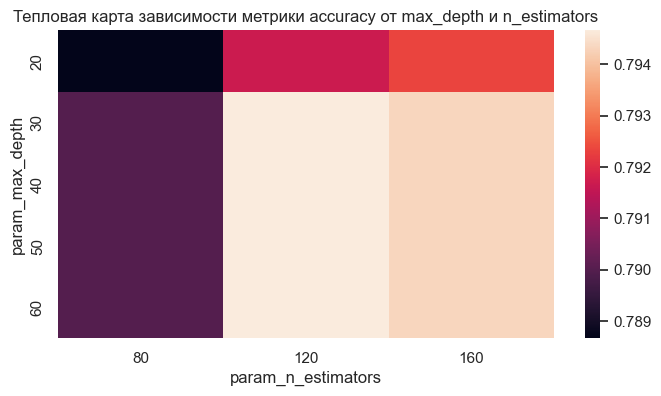

In [31]:
# Посмотрим, как менялась точность при различных гиперпараметрах
visual = pd.pivot_table(pd.DataFrame(grid_search_rf.cv_results_),
                        values='mean_test_score',
                        index = 'param_max_depth',
                        columns = 'param_n_estimators')

sns.heatmap(visual)
plt.title('Тепловая карта зависимости метрики accuracy от max_depth и n_estimators') # подпись графика
sns.set(rc={'figure.figsize':(12, 8)}) #задаем размер графика

По графику можно увидеть, что наилучшая accuracy достигается при 120 деревьях случайного леса и максимальной глубиной 30.

#### <center> **RandomizedSearchCV**

In [32]:
# задаём сетку гиперпараметров
param_distributions = {'n_estimators': list(range(80, 200, 40)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 60, 5, dtype=int))
              }
# создаём объект класса RandomizedSearchCV()
random_search_rf = RandomizedSearchCV(
    estimator = ensemble.RandomForestClassifier(random_state=42),
    param_distributions = param_distributions,
    cv = 5,
    n_iter = 15,
    n_jobs = -1

)
%time
random_search_rf.fit(X_train, y_train)
print('accuracy на тестовом наборе данных: {:.2f}'.format(random_search_rf.score(X_test, y_test)))
y_test_pred = grid_search_rf.predict(X_test)
print('наилучшая средняя точность-accuracy кросс-валидации {:.2f}'.format(random_search_rf.best_score_))
print('f1-score на тестовом наборе данных: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('наилучшие значения параметров: {}'.format(random_search_rf.best_params_))

CPU times: total: 0 ns
Wall time: 0 ns
accuracy на тестовом наборе данных: 0.79
наилучшая средняя точность-accuracy кросс-валидации 0.79
f1-score на тестовом наборе данных: 0.81
наилучшие значения параметров: {'n_estimators': 120, 'min_samples_leaf': 5, 'max_depth': 30}


По результатам оценок, можно сказать, что пока по подбору гиперпараметров лидирует Случайный лес с гиперпараметрами по умолчанию, возможно сетка гиперпараметров не попадает в "нужный" диапазон.

### **HYPEROPT**

In [33]:
# Загружаем необходимые бибилиотеки
import hyperopt
from hyperopt import hp, fmin, tpe, Trials

# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

print("Версия Hyperopt : {}".format(hyperopt.__version__))


Версия Hyperopt : 0.2.7


In [34]:
# зададим пространство гиперпараметров
space = {'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
         'max_depth': hp.quniform('max_depth', 20, 40, 1),
         'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 10, 1)}

#создаём функцию минимизации
def hyperopt_fn(params, cv=5, X=X_train, y=y_train, random_state=42):
  params_enter = {'n_estimators' : int(params['n_estimators']),
                  'max_depth' : int(params['max_depth']),
                  'min_samples_leaf' :  int(params['min_samples_leaf'])}
  model = ensemble.RandomForestClassifier(**params_enter, random_state=random_state)

  model.fit(X,y)
  score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs = -1).mean()

  # метрику необходимо минимизировать, поэтому ставим знак минус
  return - score

In [35]:
%%time
random_state=42
# Начинаем подбор гиперпараметров
trials = Trials() # для логирования результатов

best_params = fmin(hyperopt_fn, # наша функция
                   space = space, # пространство гиперпараметров
                   algo = tpe.suggest, # алгоритм оптимизации, установлен по умолчанию
                   max_evals = 20, # максимальное количество итераций
                   trials = trials, # логирование результатов
                   rstate = np.random.default_rng(random_state)) # фиксируем для повторяемости результата

print('наилучшие значения гиперпараметров:{}'.format(best_params))

100%|██████████| 20/20 [01:08<00:00,  3.42s/trial, best loss: -0.8135045209241927]
наилучшие значения гиперпараметров:{'max_depth': 32.0, 'min_samples_leaf': 4.0, 'n_estimators': 115.0}
CPU times: total: 23.8 s
Wall time: 1min 8s


In [36]:
# используя наилучшие параметры обучим модель
model = ensemble.RandomForestClassifier(
                            n_estimators = int(best_params['n_estimators']),
                            max_depth = int(best_params['max_depth']),
                            min_samples_leaf = int(best_params['min_samples_leaf']),
                            random_state=42)
# обучим модель
model.fit(X_train, y_train)
# Расчитываем метрику на тестовом наборе
print('accuracy на теством наборе данных: {:.2f}'.format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе данных {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на теством наборе данных: 0.79
f1_score на тестовом наборе данных 0.80


Результаты оптимизации через hyperopt дали метрику ниже чем RandomizedSearchCV и GridSearchCV, попробуем продолжить поиск гиперпараметров, чтобы получить лучшие результаты.

In [37]:
# если необходимо продолжить подбор,
# то увеличиваем max_evals(должен быть строго больше, чем на предыдуших итерациях)
# и используем старый trials
best_params=fmin(hyperopt_fn, # наша функция
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=30, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )
print("Наилучшие значения гиперпараметров {}".format(best_params))

 67%|██████▋   | 20/30 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 30/30 [00:41<00:00,  4.14s/trial, best loss: -0.8151618680076546]
Наилучшие значения гиперпараметров {'max_depth': 33.0, 'min_samples_leaf': 5.0, 'n_estimators': 157.0}


In [38]:
# и ещё раз обучаем модель и получаем метрику с новыми параметрами
model = ensemble.RandomForestClassifier(
                            n_estimators = int(best_params['n_estimators']),
                            max_depth = int(best_params['max_depth']),
                            min_samples_leaf = int(best_params['min_samples_leaf']),
                            random_state=42)

model.fit(X_train, y_train)
print('accuracy на теством наборе данных: {:.2f}'.format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе данных {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на теством наборе данных: 0.79
f1_score на тестовом наборе данных 0.81


С применением hyperopt метрика f1-score достигла того же показателя, что и RandomizedSearchCV() и GridSearchCV() однако время оптимизации значительно сократилось, даже с учетом продолжения оптимизации.

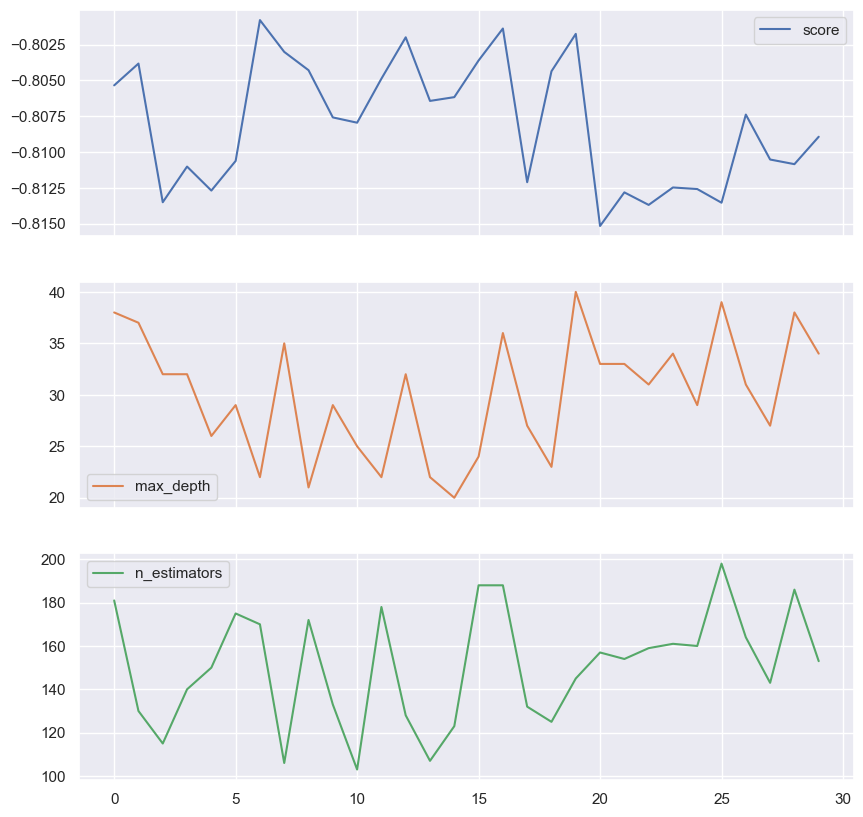

In [39]:
# отрисуем, как менялась точность при различных гиперпараметрах
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'max_depth', 'n_estimators'])
# тепловая карта в данном случае не очень наглядна, возьмем линейный график
tpe_results_df.plot(subplots=True,figsize=(10, 10));

### **OPTUNA**

In [40]:
# Загружаем framework
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.6.0


In [41]:
# Создаём функцию для оптимизации гиперпараметров, которая будет принимать
# сгенерированные комбинации гиперпараметров и возвращать метрику
def optuna_fn (trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)

  #обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))
  return score

In [42]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name='RandomForestClassifier', direction='maximize')
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_fn, n_trials=20)

[I 2024-03-29 23:53:08,390] A new study created in memory with name: RandomForestClassifier
C:\Users\Mira\AppData\Local\Temp\ipykernel_1492\128067720.py:5: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
C:\Users\Mira\AppData\Local\Temp\ipykernel_1492\128067720.py:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
C:\Users\Mira\AppData\Local\Temp\ipykernel_1492\128067720.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
[I 2024-03-29 23:53:09,714] Trial 0 finished with value: 0.9215328467153284 and parameters: {'n_estimators': 122, 'max_depth': 29, 'min_samples_leaf': 7}. Bes

CPU times: total: 25.9 s
Wall time: 36.8 s


In [43]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 198, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.99


In [44]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params, random_state=42)
model.fit(X_train, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('f1_score на тренировочном наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.81
f1_score на тренировочном наборе: 0.99
f1_score на тестовом наборе: 0.82


Метрика значительно улучшилась, достигла значения при модели случайного леса по умолчанию, однако время потраченное на поиски гиперпараметров оказалось меньше чем во всех предыдущих методах.

Графики истории оптимизации

In [45]:
# Проверим доступность поддержки визуализации
optuna.visualization.is_available()

True

In [46]:
optuna.visualization.plot_optimization_history(study, target_name = 'f1_score')

График важности гиперпараметров

In [47]:
optuna.visualization.plot_param_importances(study, target_name = 'f1_score')

График контура отношений гиперпараметров

In [48]:
optuna.visualization.plot_contour(study, params = ['max_depth', 'n_estimators'], target_name = 'f1_score')

По графику видно, что точки с темно-синим фоном, то есть с высоким f1-score находятся в близи значений n_estimators = 200 и max_depth = 21.